# Polars Pipeline Class Test

This notebook is dedicated towards testing the functionality of the PolarsPipeline abstract class defined in leash_bio_ai\data\polars. The purpose of this class is to provide a template and some setup like logging to other classes that will be created to execute polars data pipelines. 

In [2]:
import sys
import polars as pl

sys.path.append('..')
from leash_bio_ai.data.polars import PolarsPipeline, PipelineError
from leash_bio_ai.utils.conf import test_logger_file, train_dir

#### Sample Pipeline

Here we utilize the abstract class to create another class that executes a an example of a data pipeline in polars. 

In [3]:
class TestPipeline(PolarsPipeline):
    def __init__(self, logger_file):
        super().__init__(logger_file)
        self.df = self.dataframe()

    def dataframe(self):
        train_df = pl.read_parquet(source=train_dir, 
                                   n_rows=500)
        return train_df

    def execute(self):
        try:
            self.logger.info("Sampling 100 rows")
            self.df = self.df.sample(n=100)

            self.logger.info("Create boolean column")
            self.df = self.df.with_columns((pl.col("binds")==0).alias("binds_bool"))
            
        except:
            self.logger.info("An error occured in the pipeline")
            raise PipelineError("An error occured in the pipeline")

Instantiate an object from the class and ensure the logger is setup. 

In [4]:
oTestPipeline = TestPipeline(logger_file=test_logger_file)
oTestPipeline.logger

<Logger leash_bio_ai.data.polars (DEBUG)>

Display the dataframe resulting from the dataframe method.

In [6]:
oTestPipeline.df.head(n=5)

id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name,binds
i64,str,str,str,str,str,i64
0,"""C#CC[C@@H](CC(=O)O)NC(=O)OCC1c…","""C#CCOc1ccc(CN)cc1.Cl""","""Br.Br.NCC1CCCN1c1cccnn1""","""C#CCOc1ccc(CNc2nc(NCC3CCCN3c3c…","""BRD4""",0
1,"""C#CC[C@@H](CC(=O)O)NC(=O)OCC1c…","""C#CCOc1ccc(CN)cc1.Cl""","""Br.Br.NCC1CCCN1c1cccnn1""","""C#CCOc1ccc(CNc2nc(NCC3CCCN3c3c…","""HSA""",0
2,"""C#CC[C@@H](CC(=O)O)NC(=O)OCC1c…","""C#CCOc1ccc(CN)cc1.Cl""","""Br.Br.NCC1CCCN1c1cccnn1""","""C#CCOc1ccc(CNc2nc(NCC3CCCN3c3c…","""sEH""",0
3,"""C#CC[C@@H](CC(=O)O)NC(=O)OCC1c…","""C#CCOc1ccc(CN)cc1.Cl""","""Br.NCc1cccc(Br)n1""","""C#CCOc1ccc(CNc2nc(NCc3cccc(Br)…","""BRD4""",0
4,"""C#CC[C@@H](CC(=O)O)NC(=O)OCC1c…","""C#CCOc1ccc(CN)cc1.Cl""","""Br.NCc1cccc(Br)n1""","""C#CCOc1ccc(CNc2nc(NCc3cccc(Br)…","""HSA""",0


Call the execute method for the defined pipeline.

In [7]:
oTestPipeline.execute()

Displayed is the logger output after calling the execute method, we can see the logger looks as we would except. 

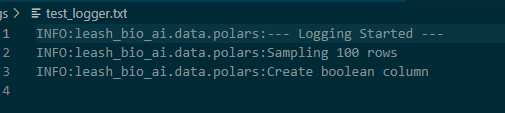

Check that the dataframe is as expected given how we defined the execute method:
1. Contains 100 rows
2. Contains a "binds_bool" column

In [9]:
oTestPipeline.df.count()

id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name,binds,binds_bool
u32,u32,u32,u32,u32,u32,u32,u32
100,100,100,100,100,100,100,100


In [11]:
oTestPipeline.df.select("binds_bool").head(n=10)

binds_bool
bool
true
true
true
true
true
true
true
true
true
